# Solution Part:
* Data Understanding
* Data Exploration
* Data Cleaning
* Data Preparation/Feature Engineering
* Model Building
* Model Evaluation

In [93]:
#Import all the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [94]:
import warnings
warnings.filterwarnings('ignore')

In [95]:
#Read the dataset
cars = pd.read_csv('AAAG Database.csv', encoding='latin1')

In [96]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [97]:
pd.set_option('display.max_rows', None)
cars.head()

,VRSELLTYPE,SALEDATE_WeekofYearNumber,SALEDATE_MonthofYearNumber,VRSALEAMT,VRMILEAGE,VRLOCATION,Vehicle_year,Vehicle_cylinders,Vehicle_botcolor,Vehicle_doors,Vehicle_trantype,Vehicle_maker,Vehicle_line,Vehicle_fuel,Vehicle_btext,Vehicle_airbag,Vehicle_engine,Vehicle_drive,Vehicle_condition_crstatus,Vehicle_condition_drivable,Vehicle_condition_overall,Vehicle_condition_grade_1,Vehicle_condition_grade_2,Misc_SalesChannel
0,L,32,8,7200,84360,COLUMBUS,2017,4,BLK,4,A,GMC,Terrain,G,Sport Utility,Y,2.4,F,C,Y,2.0,3.5,2.4,IN LANE
1,C,24,6,650,145320,JACKSONVILLE,2014,4,RED,4,A,MAZDA,Mazda6,G,4dr Car,NaN,2.5,F,NaN,NaN,NaN,0.0,0.0,IN LANE
2,L,7,2,2200,99420,KANSAS,2015,4,BLU,4,A,NISSAN,Altima,G,4dr Car,Y,2.5,F,C,Y,2.0,2.5,1.6,IN LANE
3,L,32,8,11000,71021,AUSTIN,2014,4,TAN,4,A,HONDA,Accord Sedan,G,4dr Car,Y,2.4,F,C,Y,3.0,4.8,2.5,SIMULCAST
4,L,38,9,6900,82579,AUSTIN,2019,4,GRY,4,A,JEEP,Compass,G,Sport Utility,NaN,2.4,4,C,Y,2.0,0.0,2.3,SIMULCAST


In [98]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640825 entries, 0 to 640824
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   VRSELLTYPE                  640825 non-null  object 
 1   SALEDATE_WeekofYearNumber   640825 non-null  int64  
 2   SALEDATE_MonthofYearNumber  640825 non-null  int64  
 3   VRSALEAMT                   640825 non-null  int64  
 4   VRMILEAGE                   640825 non-null  int64  
 5   VRLOCATION                  640825 non-null  object 
 6   Vehicle_year                640825 non-null  int64  
 7   Vehicle_cylinders           640825 non-null  int64  
 8   Vehicle_botcolor            604019 non-null  object 
 9   Vehicle_doors               640825 non-null  int64  
 10  Vehicle_trantype            604470 non-null  object 
 11  Vehicle_maker               603385 non-null  object 
 12  Vehicle_line                603384 non-null  object 
 13  Vehicle_fuel  

Data Exploration

In [99]:
cars_numeric = cars.select_dtypes(include=['float64','int64'])
cars_numeric.head()

,SALEDATE_WeekofYearNumber,SALEDATE_MonthofYearNumber,VRSALEAMT,VRMILEAGE,Vehicle_year,Vehicle_cylinders,Vehicle_doors,Vehicle_engine,Vehicle_condition_overall,Vehicle_condition_grade_1,Vehicle_condition_grade_2
0,32,8,7200,84360,2017,4,4,2.4,2.0,3.5,2.4
1,24,6,650,145320,2014,4,4,2.5,NaN,0.0,0.0
2,7,2,2200,99420,2015,4,4,2.5,2.0,2.5,1.6
3,32,8,11000,71021,2014,4,4,2.4,3.0,4.8,2.5
4,38,9,6900,82579,2019,4,4,2.4,2.0,0.0,2.3


In [100]:
cars_numeric.head()

,SALEDATE_WeekofYearNumber,SALEDATE_MonthofYearNumber,VRSALEAMT,VRMILEAGE,Vehicle_year,Vehicle_cylinders,Vehicle_doors,Vehicle_engine,Vehicle_condition_overall,Vehicle_condition_grade_1,Vehicle_condition_grade_2
0,32,8,7200,84360,2017,4,4,2.4,2.0,3.5,2.4
1,24,6,650,145320,2014,4,4,2.5,NaN,0.0,0.0
2,7,2,2200,99420,2015,4,4,2.5,2.0,2.5,1.6
3,32,8,11000,71021,2014,4,4,2.4,3.0,4.8,2.5
4,38,9,6900,82579,2019,4,4,2.4,2.0,0.0,2.3


<Figure size 2000x1000 with 0 Axes>

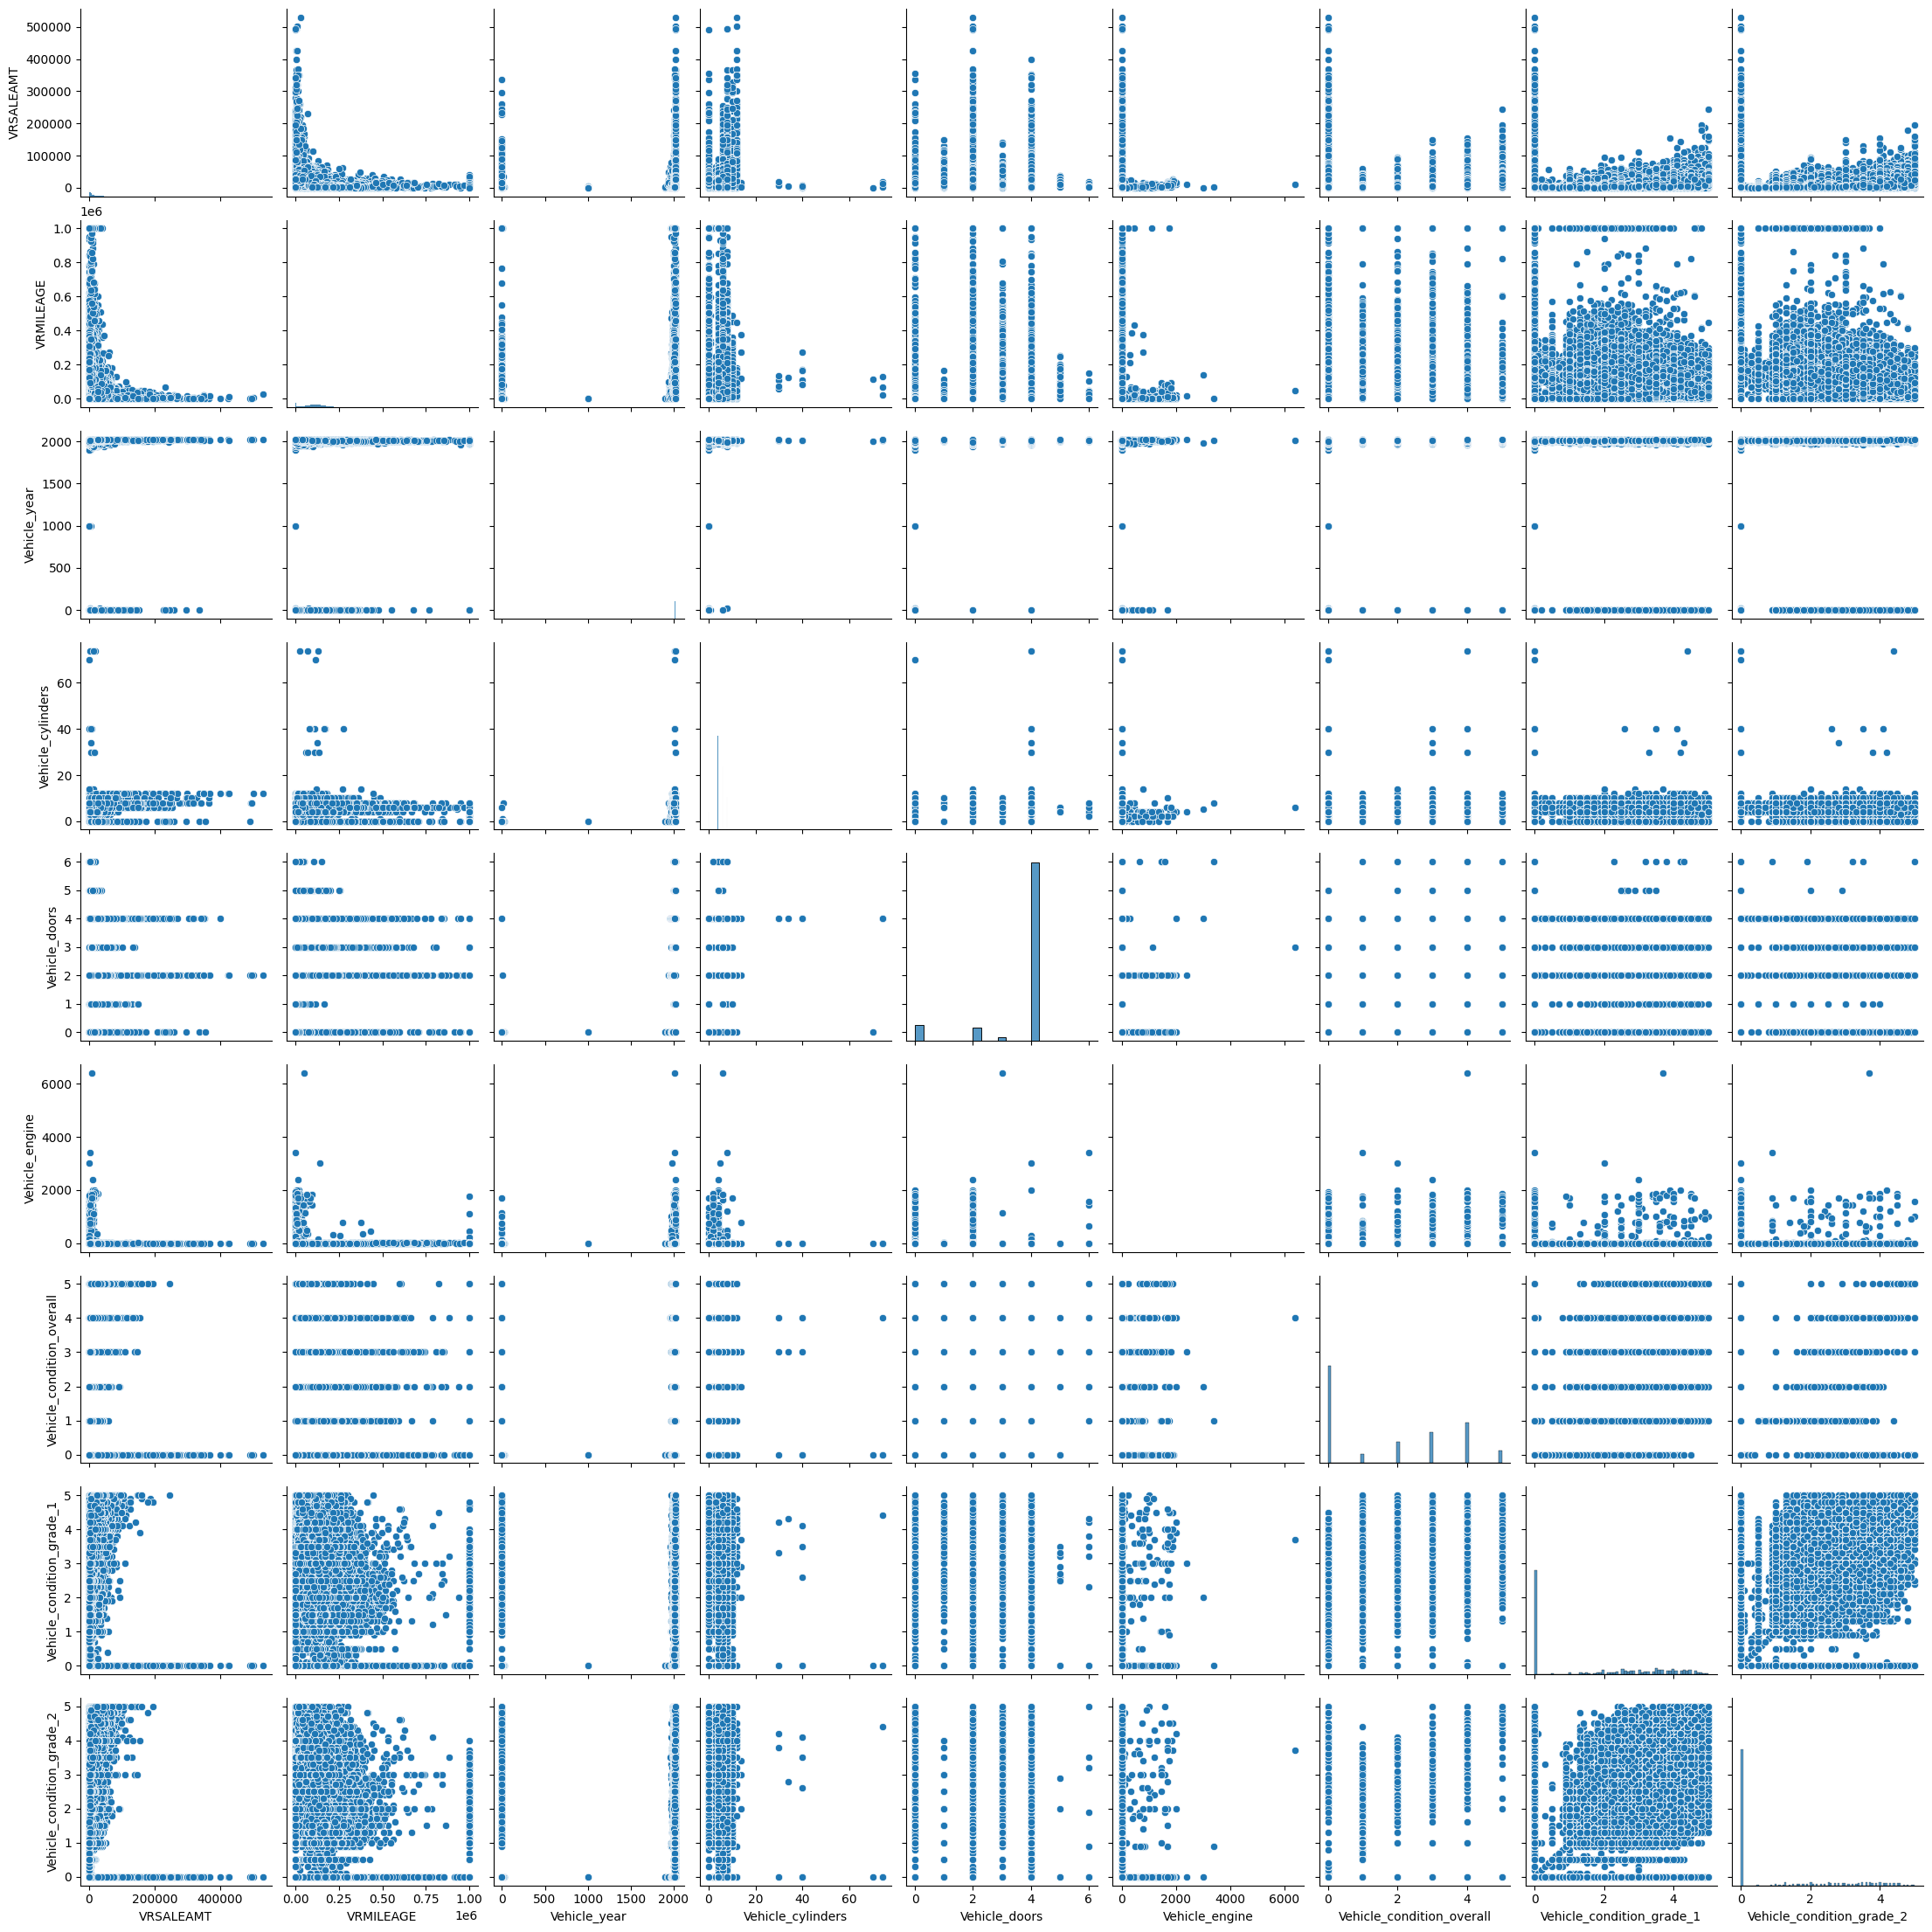

In [9]:
#Pairwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(cars_numeric)
plt.show()

In [101]:
#Correlation plot
cor = cars_numeric.corr()
cor

,SALEDATE_WeekofYearNumber,SALEDATE_MonthofYearNumber,VRSALEAMT,VRMILEAGE,Vehicle_year,Vehicle_cylinders,Vehicle_doors,Vehicle_engine,Vehicle_condition_overall,Vehicle_condition_grade_1,Vehicle_condition_grade_2
SALEDATE_WeekofYearNumber,1.000000,0.995496,-0.011207,0.003895,-0.017107,0.027800,0.052640,0.001840,-0.003355,0.025377,0.125465
SALEDATE_MonthofYearNumber,0.995496,1.000000,-0.010919,0.003581,-0.016858,0.027476,0.051999,0.001869,-0.002740,0.025732,0.123866
VRSALEAMT,-0.011207,-0.010919,1.000000,-0.570085,0.012840,0.111122,-0.073136,0.003163,0.516468,0.244343,0.151602
VRMILEAGE,0.003895,0.003581,-0.570085,1.000000,0.015347,0.149428,0.033300,-0.026596,-0.389281,-0.313242,-0.220861
Vehicle_year,-0.017107,-0.016858,0.012840,0.015347,1.000000,0.292921,0.411457,-0.011218,0.011634,-0.074984,-0.107322
Vehicle_cylinders,0.027800,0.027476,0.111122,0.149428,0.292921,1.000000,0.478226,-0.002123,0.012699,-0.053250,-0.069140
Vehicle_doors,0.052640,0.051999,-0.073136,0.033300,0.411457,0.478226,1.000000,-0.096598,0.027480,-0.026710,-0.047366
Vehicle_engine,0.001840,0.001869,0.003163,-0.026596,-0.011218,-0.002123,-0.096598,1.000000,-0.000094,-0.012103,-0.009489
Vehicle_condition_overall,-0.003355,-0.002740,0.516468,-0.389281,0.011634,0.012699,0.027480,-0.000094,1.000000,0.742671,0.368520
Vehicle_condition_grade_1,0.025377,0.025732,0.244343,-0.313242,-0.074984,-0.053250,-0.026710,-0.012103,0.742671,1.000000,0.611374


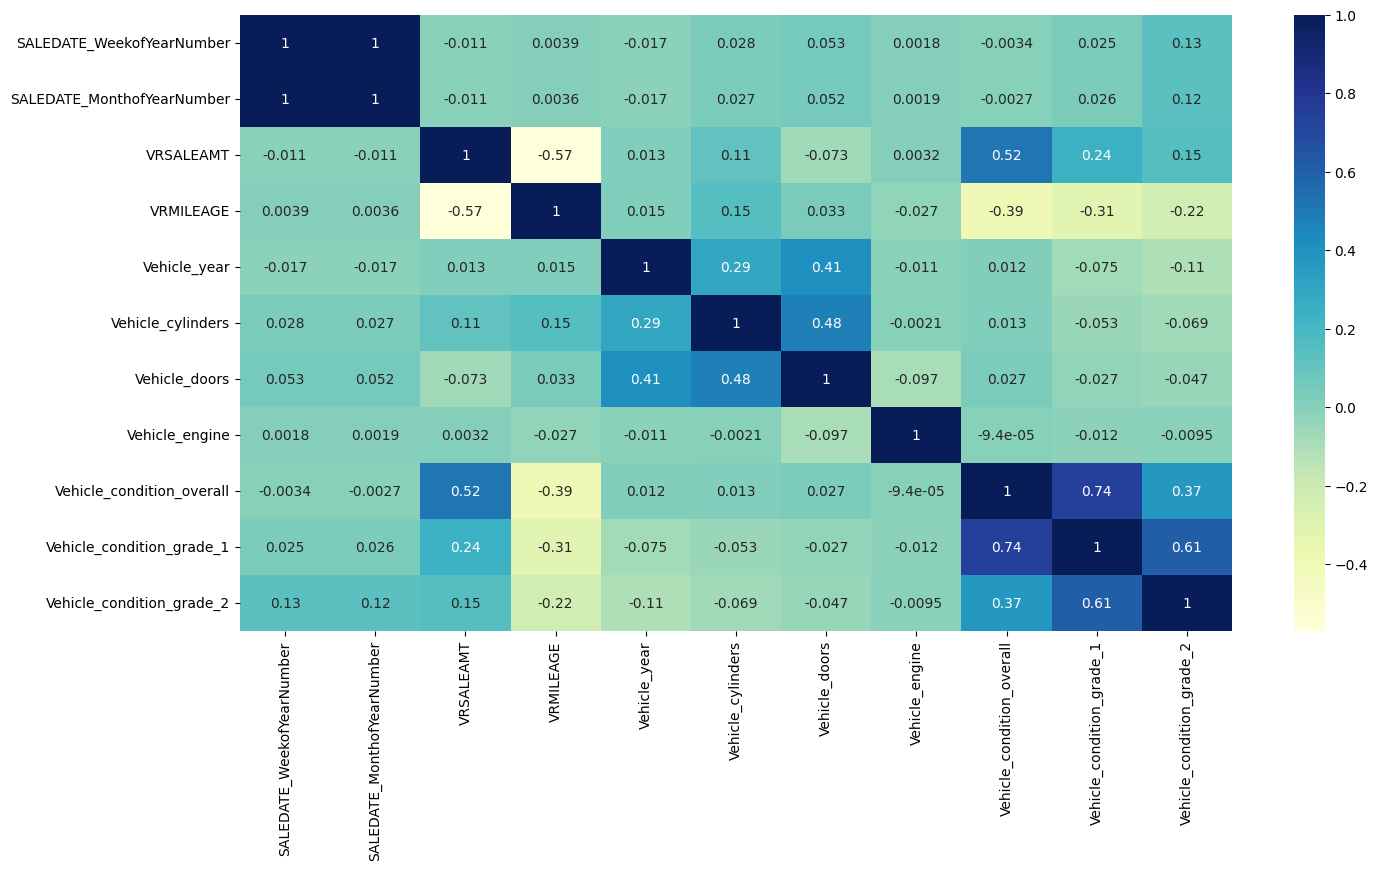

In [102]:
plt.figure(figsize=(16,8))
sns.heatmap(cor, cmap='YlGnBu', annot=True)

plt.show()

Data Cleaning

In [103]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640825 entries, 0 to 640824
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   VRSELLTYPE                  640825 non-null  object 
 1   SALEDATE_WeekofYearNumber   640825 non-null  int64  
 2   SALEDATE_MonthofYearNumber  640825 non-null  int64  
 3   VRSALEAMT                   640825 non-null  int64  
 4   VRMILEAGE                   640825 non-null  int64  
 5   VRLOCATION                  640825 non-null  object 
 6   Vehicle_year                640825 non-null  int64  
 7   Vehicle_cylinders           640825 non-null  int64  
 8   Vehicle_botcolor            604019 non-null  object 
 9   Vehicle_doors               640825 non-null  int64  
 10  Vehicle_trantype            604470 non-null  object 
 11  Vehicle_maker               603385 non-null  object 
 12  Vehicle_line                603384 non-null  object 
 13  Vehicle_fuel  

In [104]:
cars['Vehicle_maker'][:20]

0            GMC
1          MAZDA
2         NISSAN
3          HONDA
4           JEEP
5        LINCOLN
6           FORD
7           JEEP
8           FORD
9           FORD
10       HYUNDAI
11          FORD
12          FORD
13         BUICK
14        NISSAN
15         DODGE
16         DODGE
17         HONDA
18          FORD
19    VOLKSWAGEN
Name: Vehicle_maker, dtype: object

In [105]:
cars['Vehicle_maker'].astype('category').value_counts()

Vehicle_maker
CHEVROLET                      99218
FORD                           97807
NISSAN                         44241
TOYOTA                         40434
JEEP                           34787
HONDA                          32330
HYUNDAI                        28447
DODGE                          27159
KIA                            27151
GMC                            23504
RAM                            17536
CHRYSLER                       12246
VOLKSWAGEN                     11055
BUICK                          10582
SUBARU                         10376
MERCEDES-BENZ                   9844
BMW                             9574
CADILLAC                        9138
MAZDA                           7640
LEXUS                           6472
AUDI                            5927
INFINITI                        5012
MITSUBISHI                      4753
LINCOLN                         4695
ACURA                           4393
LAND ROVER                      2886
VOLVO                   

In [106]:
cars.describe()

,SALEDATE_WeekofYearNumber,SALEDATE_MonthofYearNumber,VRSALEAMT,VRMILEAGE,Vehicle_year,Vehicle_cylinders,Vehicle_doors,Vehicle_engine,Vehicle_condition_overall,Vehicle_condition_grade_1,Vehicle_condition_grade_2
count,640825.000000,640825.000000,640825.000000,640825.000000,640825.000000,640825.000000,640825.000000,600635.000000,360188.000000,602916.000000,602916.000000
mean,22.938821,5.759176,10689.486401,117969.864450,1986.259341,4.957904,3.606326,3.894649,3.169109,1.804303,1.243271
std,12.948862,2.992560,11956.500005,61399.687405,238.990003,2.015110,1.057273,33.493745,1.203718,1.781419,1.656731
min,1.000000,1.000000,1.000000,11.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,2900.000000,75934.000000,2012.000000,4.000000,4.000000,2.000000,2.000000,0.000000,0.000000
50%,23.000000,6.000000,6900.000000,114682.000000,2015.000000,4.000000,4.000000,2.700000,3.000000,1.900000,0.000000
75%,34.000000,8.000000,14800.000000,154995.000000,2019.000000,6.000000,4.000000,3.600000,4.000000,3.500000,2.700000
max,46.000000,11.000000,530000.000000,999998.000000,2025.000000,74.000000,6.000000,6400.000000,5.000000,5.000000,5.000000


Data Preparation

In [107]:
cars = cars.drop(['Vehicle_condition_grade_1'], axis=1)
cars.head()

,VRSELLTYPE,SALEDATE_WeekofYearNumber,SALEDATE_MonthofYearNumber,VRSALEAMT,VRMILEAGE,VRLOCATION,Vehicle_year,Vehicle_cylinders,Vehicle_botcolor,Vehicle_doors,Vehicle_trantype,Vehicle_maker,Vehicle_line,Vehicle_fuel,Vehicle_btext,Vehicle_airbag,Vehicle_engine,Vehicle_drive,Vehicle_condition_crstatus,Vehicle_condition_drivable,Vehicle_condition_overall,Vehicle_condition_grade_2,Misc_SalesChannel
0,L,32,8,7200,84360,COLUMBUS,2017,4,BLK,4,A,GMC,Terrain,G,Sport Utility,Y,2.4,F,C,Y,2.0,2.4,IN LANE
1,C,24,6,650,145320,JACKSONVILLE,2014,4,RED,4,A,MAZDA,Mazda6,G,4dr Car,NaN,2.5,F,NaN,NaN,NaN,0.0,IN LANE
2,L,7,2,2200,99420,KANSAS,2015,4,BLU,4,A,NISSAN,Altima,G,4dr Car,Y,2.5,F,C,Y,2.0,1.6,IN LANE
3,L,32,8,11000,71021,AUSTIN,2014,4,TAN,4,A,HONDA,Accord Sedan,G,4dr Car,Y,2.4,F,C,Y,3.0,2.5,SIMULCAST
4,L,38,9,6900,82579,AUSTIN,2019,4,GRY,4,A,JEEP,Compass,G,Sport Utility,NaN,2.4,4,C,Y,2.0,2.3,SIMULCAST


In [108]:
# split into X and y
X = cars.loc[:, ['VRSELLTYPE',
       'VRMILEAGE', 'VRLOCATION', 'Vehicle_year', 'Vehicle_cylinders',
       'Vehicle_botcolor', 'Vehicle_doors', 'Vehicle_trantype', 'Vehicle_maker', 'Vehicle_line',
       'Vehicle_fuel', 'Vehicle_btext', 'Vehicle_airbag', 'Vehicle_engine', 'Vehicle_drive',
       'Vehicle_condition_crstatus', 'Vehicle_condition_drivable', 'Vehicle_condition_overall', 'Vehicle_condition_grade_2', 'Misc_SalesChannel']]

y = cars['VRSALEAMT']

In [109]:
#Subset all categorical variables
cars_categorical = cars.select_dtypes(include=['object'])
cars_categorical.head()

,VRSELLTYPE,VRLOCATION,Vehicle_botcolor,Vehicle_trantype,Vehicle_maker,Vehicle_line,Vehicle_fuel,Vehicle_btext,Vehicle_airbag,Vehicle_drive,Vehicle_condition_crstatus,Vehicle_condition_drivable,Misc_SalesChannel
0,L,COLUMBUS,BLK,A,GMC,Terrain,G,Sport Utility,Y,F,C,Y,IN LANE
1,C,JACKSONVILLE,RED,A,MAZDA,Mazda6,G,4dr Car,NaN,F,NaN,NaN,IN LANE
2,L,KANSAS,BLU,A,NISSAN,Altima,G,4dr Car,Y,F,C,Y,IN LANE
3,L,AUSTIN,TAN,A,HONDA,Accord Sedan,G,4dr Car,Y,F,C,Y,SIMULCAST
4,L,AUSTIN,GRY,A,JEEP,Compass,G,Sport Utility,NaN,4,C,Y,SIMULCAST


Create Mapping

In [110]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import category_encoders as ce

In [111]:
# Label Encoding
le = LabelEncoder()
label_mappings = {}

for col in ['VRSELLTYPE', 'Vehicle_trantype', 'Vehicle_fuel', 'Vehicle_drive', 'Misc_SalesChannel','Vehicle_condition_drivable',
            'Vehicle_condition_crstatus',"Vehicle_airbag"]:
    cars_categorical[col] = le.fit_transform(cars_categorical[col])
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Frequency Encoding
frequency_mappings = {}

for col in ['Vehicle_maker', 'Vehicle_line', 'Vehicle_botcolor', 'VRLOCATION', 'Vehicle_btext']:
    freq_map = cars_categorical[col].value_counts().to_dict()
    cars_categorical[col] = cars_categorical[col].map(freq_map)
    frequency_mappings[col] = freq_map

# Handling Missing Values
cars_categorical['Vehicle_condition_crstatus'].fillna('Unknown', inplace=True)
cars_categorical['Vehicle_condition_drivable'].fillna('Unknown', inplace=True)

# # Target Encoding
# target_enc = ce.TargetEncoder()
# for col in ['Vehicle_make', 'Vehicle_model', 'Vehicle_botcolor', 'Vehicle_intcolor', 'Location_LocationName', 'Vehicle_btext', 'Vehicle_bshort']:
#     cars_categorical[col] = target_enc.fit_transform(cars_categorical[col], cars_categorical.index) 
 
cars_categorical.head()

,VRSELLTYPE,VRLOCATION,Vehicle_botcolor,Vehicle_trantype,Vehicle_maker,Vehicle_line,Vehicle_fuel,Vehicle_btext,Vehicle_airbag,Vehicle_drive,Vehicle_condition_crstatus,Vehicle_condition_drivable,Misc_SalesChannel
0,4,32825,126308.0,9,23504.0,4679.0,6,239044.0,3,2,1,4,1
1,2,11186,54116.0,9,7640.0,1026.0,6,176184.0,4,2,5,5,1
2,4,27840,55948.0,9,44241.0,10461.0,6,176184.0,3,2,1,4,1
3,4,21893,4015.0,9,32330.0,3322.0,6,176184.0,3,2,1,4,5
4,4,21893,95528.0,9,34787.0,4444.0,6,239044.0,4,0,1,4,5


In [112]:
cars_dummies = cars_categorical
cars_dummies.head()

,VRSELLTYPE,VRLOCATION,Vehicle_botcolor,Vehicle_trantype,Vehicle_maker,Vehicle_line,Vehicle_fuel,Vehicle_btext,Vehicle_airbag,Vehicle_drive,Vehicle_condition_crstatus,Vehicle_condition_drivable,Misc_SalesChannel
0,4,32825,126308.0,9,23504.0,4679.0,6,239044.0,3,2,1,4,1
1,2,11186,54116.0,9,7640.0,1026.0,6,176184.0,4,2,5,5,1
2,4,27840,55948.0,9,44241.0,10461.0,6,176184.0,3,2,1,4,1
3,4,21893,4015.0,9,32330.0,3322.0,6,176184.0,3,2,1,4,5
4,4,21893,95528.0,9,34787.0,4444.0,6,239044.0,4,0,1,4,5


In [113]:
cars_dummies.shape

(640825, 13)

In [114]:
cars = cars.drop(list(cars_categorical.columns), axis=1)

In [115]:
cars = pd.concat([cars, cars_dummies], axis=1)

In [116]:
cars.head()

,SALEDATE_WeekofYearNumber,SALEDATE_MonthofYearNumber,VRSALEAMT,VRMILEAGE,Vehicle_year,Vehicle_cylinders,Vehicle_doors,Vehicle_engine,Vehicle_condition_overall,Vehicle_condition_grade_2,VRSELLTYPE,VRLOCATION,Vehicle_botcolor,Vehicle_trantype,Vehicle_maker,Vehicle_line,Vehicle_fuel,Vehicle_btext,Vehicle_airbag,Vehicle_drive,Vehicle_condition_crstatus,Vehicle_condition_drivable,Misc_SalesChannel
0,32,8,7200,84360,2017,4,4,2.4,2.0,2.4,4,32825,126308.0,9,23504.0,4679.0,6,239044.0,3,2,1,4,1
1,24,6,650,145320,2014,4,4,2.5,NaN,0.0,2,11186,54116.0,9,7640.0,1026.0,6,176184.0,4,2,5,5,1
2,7,2,2200,99420,2015,4,4,2.5,2.0,1.6,4,27840,55948.0,9,44241.0,10461.0,6,176184.0,3,2,1,4,1
3,32,8,11000,71021,2014,4,4,2.4,3.0,2.5,4,21893,4015.0,9,32330.0,3322.0,6,176184.0,3,2,1,4,5
4,38,9,6900,82579,2019,4,4,2.4,2.0,2.3,4,21893,95528.0,9,34787.0,4444.0,6,239044.0,4,0,1,4,5


In [117]:
# Filter for cars sold in May
Test_data = cars[cars['SALEDATE_MonthofYearNumber'] == 5]

# Filter for cars sold in other months
Train_data = cars[cars['SALEDATE_MonthofYearNumber'] != 5]

In [118]:
cars = cars.drop(['SALEDATE_MonthofYearNumber'], axis=1)
cars = cars.drop(['SALEDATE_WeekofYearNumber'], axis=1)
Test_data = Test_data.drop(['SALEDATE_MonthofYearNumber'], axis=1)
Test_data = Test_data.drop(['SALEDATE_WeekofYearNumber'], axis=1)
Train_data = Train_data.drop(['SALEDATE_MonthofYearNumber'], axis=1)
Train_data = Train_data.drop(['SALEDATE_WeekofYearNumber'], axis=1)

In [119]:
# drop categorical variables 
X = X.drop(list(cars_categorical.columns), axis=1)

In [120]:
# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)

In [121]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['VRMILEAGE', 'Vehicle_year', 'Vehicle_cylinders', 'Vehicle_doors',
       'Vehicle_engine', 'Vehicle_condition_overall',
       'Vehicle_condition_grade_2', 'VRSELLTYPE', 'VRLOCATION',
       'Vehicle_botcolor', 'Vehicle_trantype', 'Vehicle_maker', 'Vehicle_line',
       'Vehicle_fuel', 'Vehicle_btext', 'Vehicle_airbag', 'Vehicle_drive',
       'Vehicle_condition_crstatus', 'Vehicle_condition_drivable',
       'Misc_SalesChannel'],
      dtype='object')

In [122]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [123]:
# from sklearn.model_selection import train_test_split, cross_val_score

# # Initial split: 99% training and 1% remaining
# X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, train_size=0.99, random_state=42)

# # Second split: 50% cross-validation and 50% testing from the remaining 1%
# X_cv, X_test, y_cv, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# print("Training set size:", X_train.shape)
# print("Cross-validation set size:", X_cv.shape)
# print("Test set size:", X_test.shape)

In [124]:
# Define your features and target variable
X_train = Train_data.drop(columns=['VRSALEAMT'])
y_train = Train_data['VRSALEAMT']

X_test = Test_data.drop(columns=['VRSALEAMT'])
y_test = Test_data['VRSALEAMT']


In [125]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(584233, 20)
(584233,)
(56592, 20)
(56592,)


Model Building and Evaluation

In [126]:
# from sklearn import linear_model
# from sklearn.linear_model import LinearRegression

In [127]:
# # Building the first model with all the features

# # instantiate
# lm = LinearRegression()

# # fit
# lm.fit(X_train, y_train)

In [128]:
# # print coefficients and intercept
# print(lm.coef_)
# print(lm.intercept_)

In [129]:
# # # predict 
# y_pred = lm.predict(X_test)

# # # metrics
# from sklearn.metrics import r2_score

# print(r2_score(y_true=y_test, y_pred=y_pred))

Feature Selection

In [130]:
# # # RFE with 15 features
# from sklearn.feature_selection import RFE
# lm = LinearRegression()
# rfe_15 = RFE(lm, n_features_to_select = 20)

# # # fit with 15 features
# rfe_15.fit(X_train, y_train)

# # # Printing the boolean results
# print(rfe_15.support_)           
# print(rfe_15.ranking_)  

In [131]:
# # making predictions using rfe model
# y_pred = rfe_15.predict(X_test)

# # r-squared
# print(r2_score(y_test, y_pred))

In [132]:
# # RFE with 6 features
# from sklearn.feature_selection import RFE

# # RFE with 6 features
# lm = LinearRegression()
# rfe_6 = RFE(lm, n_features_to_select = 6)

# # fit with 6 features
# rfe_6.fit(X_train, y_train)

# # predict
# y_pred = rfe_6.predict(X_test)

# # r-squared
# print(r2_score(y_test, y_pred))

Random Forest

In [133]:
cars.head()

,VRSALEAMT,VRMILEAGE,Vehicle_year,Vehicle_cylinders,Vehicle_doors,Vehicle_engine,Vehicle_condition_overall,Vehicle_condition_grade_2,VRSELLTYPE,VRLOCATION,Vehicle_botcolor,Vehicle_trantype,Vehicle_maker,Vehicle_line,Vehicle_fuel,Vehicle_btext,Vehicle_airbag,Vehicle_drive,Vehicle_condition_crstatus,Vehicle_condition_drivable,Misc_SalesChannel
0,7200,84360,2017,4,4,2.4,2.0,2.4,4,32825,126308.0,9,23504.0,4679.0,6,239044.0,3,2,1,4,1
1,650,145320,2014,4,4,2.5,NaN,0.0,2,11186,54116.0,9,7640.0,1026.0,6,176184.0,4,2,5,5,1
2,2200,99420,2015,4,4,2.5,2.0,1.6,4,27840,55948.0,9,44241.0,10461.0,6,176184.0,3,2,1,4,1
3,11000,71021,2014,4,4,2.4,3.0,2.5,4,21893,4015.0,9,32330.0,3322.0,6,176184.0,3,2,1,4,5
4,6900,82579,2019,4,4,2.4,2.0,2.3,4,21893,95528.0,9,34787.0,4444.0,6,239044.0,4,0,1,4,5


In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [135]:
X_train.head()

,VRMILEAGE,Vehicle_year,Vehicle_cylinders,Vehicle_doors,Vehicle_engine,Vehicle_condition_overall,Vehicle_condition_grade_2,VRSELLTYPE,VRLOCATION,Vehicle_botcolor,Vehicle_trantype,Vehicle_maker,Vehicle_line,Vehicle_fuel,Vehicle_btext,Vehicle_airbag,Vehicle_drive,Vehicle_condition_crstatus,Vehicle_condition_drivable,Misc_SalesChannel
0,84360,2017,4,4,2.4,2.0,2.4,4,32825,126308.0,9,23504.0,4679.0,6,239044.0,3,2,1,4,1
1,145320,2014,4,4,2.5,NaN,0.0,2,11186,54116.0,9,7640.0,1026.0,6,176184.0,4,2,5,5,1
2,99420,2015,4,4,2.5,2.0,1.6,4,27840,55948.0,9,44241.0,10461.0,6,176184.0,3,2,1,4,1
3,71021,2014,4,4,2.4,3.0,2.5,4,21893,4015.0,9,32330.0,3322.0,6,176184.0,3,2,1,4,5
4,82579,2019,4,4,2.4,2.0,2.3,4,21893,95528.0,9,34787.0,4444.0,6,239044.0,4,0,1,4,5


In [157]:
# Updating the RandomForestRegressor with the best parameters
rf = RandomForestRegressor(
    n_estimators=231,
    max_depth=40,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='log2',
    random_state=42
)

# Perform cross-validation on the training set
# cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
# print("Cross-validation R^2 scores:", cv_scores)
# print("Mean cross-validation R^2 score:", cv_scores.mean())

In [158]:
# Fit the model
rf.fit(X_train, y_train)

# Print feature importances
print(rf.feature_importances_)

[0.27632958 0.25861289 0.05328516 0.00655419 0.09297247 0.04920272
 0.02224628 0.0078311  0.01101039 0.00886143 0.00227436 0.04713978
 0.03666855 0.01339596 0.03075634 0.00935089 0.04053879 0.00893724
 0.00663225 0.01739962]


In [159]:
# Predict
rf_predictions = rf.predict(X_test)

# Calculate r2 score
print(r2_score(y_true=y_test, y_pred=rf_predictions)) 

0.8805313996766833


In [51]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Objective function for Optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_categorical('max_depth', [None, 10, 20, 30, 40, 50])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 15)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 6)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    score = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
    return score.mean()

# Create a study object and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=25)

# Print the best parameters
print("Best Parameters:", study.best_params)
print("Best Cross-Validation R^2 Score:", study.best_value)


[I 2024-10-29 16:34:00,199] A new study created in memory with name: no-name-0558edc0-d575-46ea-b948-7ccd39976809
[I 2024-10-29 16:41:22,257] Trial 0 finished with value: 0.8790368492854539 and parameters: {'n_estimators': 165, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.8790368492854539.
[I 2024-10-29 16:49:02,452] Trial 1 finished with value: 0.8775067035629147 and parameters: {'n_estimators': 163, 'max_depth': None, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.8790368492854539.
[I 2024-10-29 17:08:21,225] Trial 2 finished with value: 0.8740500553207641 and parameters: {'n_estimators': 421, 'max_depth': 50, 'min_samples_split': 11, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 0 with value: 0.8790368492854539.
[I 2024-10-29 17:19:17,424] Trial 3 finished with value: 0.8719117829430681 and parameters: {'n_estimators': 265, 'max_depth': 20

Best Parameters: {'n_estimators': 323, 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}
Best Cross-Validation R^2 Score: 0.8852540866667624


XGBoost

In [139]:
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [160]:
xgb = XGBRegressor(
    n_estimators=292,
    max_depth=10,
    learning_rate=0.0769936478290876,
    min_child_weight=6,
    subsample=0.8553774408813275,
    colsample_bytree=0.9456452572230258,
    random_state=42
)

In [161]:
# Fit the model
xgb.fit(X_train, y_train)

# Print feature importances
print(xgb.feature_importances_)

[0.08789558 0.28538528 0.08037637 0.03679449 0.13217309 0.04078404
 0.00467337 0.04239012 0.00387323 0.0065901  0.00731434 0.04772192
 0.01615941 0.03697885 0.01643105 0.01572617 0.05177734 0.05433854
 0.01629592 0.01632079]


In [162]:
# Predict on the test set
xgb_predictions = xgb.predict(X_test)

# Calculate r2 score
print(r2_score(y_true=y_test, y_pred=xgb_predictions))

# Calculate mean absolute error
print(mean_absolute_error(y_true=y_test, y_pred=xgb_predictions))

0.9049504995346069
1801.4533068506114


In [55]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# Objective function for Optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)

    xgb = XGBRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42
    )

    score = cross_val_score(xgb, X_train, y_train, cv=5, scoring='r2')
    return score.mean()

# Create a study object and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=25)

# Print the best parameters
print("Best Parameters:", study.best_params)
print("Best Cross-Validation R^2 Score:", study.best_value)

[I 2024-11-04 19:45:04,092] A new study created in memory with name: no-name-4c926200-c20a-4a09-91a7-409b9ed1b6a4
[I 2024-11-04 19:45:52,541] Trial 0 finished with value: 0.8979778170585633 and parameters: {'n_estimators': 271, 'max_depth': 9, 'learning_rate': 0.03565252285480743, 'min_child_weight': 8, 'subsample': 0.800023142507221, 'colsample_bytree': 0.7414845346100984}. Best is trial 0 with value: 0.8979778170585633.
[I 2024-11-04 19:46:46,227] Trial 1 finished with value: 0.9004931211471557 and parameters: {'n_estimators': 471, 'max_depth': 7, 'learning_rate': 0.14917421463410638, 'min_child_weight': 9, 'subsample': 0.790546264960514, 'colsample_bytree': 0.9579044993715704}. Best is trial 1 with value: 0.9004931211471557.
[I 2024-11-04 19:47:16,363] Trial 2 finished with value: 0.8930208206176757 and parameters: {'n_estimators': 230, 'max_depth': 8, 'learning_rate': 0.2796115905896336, 'min_child_weight': 4, 'subsample': 0.6509108471860753, 'colsample_bytree': 0.9034867402606963}

Best Parameters: {'n_estimators': 292, 'max_depth': 10, 'learning_rate': 0.0769936478290876, 'min_child_weight': 6, 'subsample': 0.8553774408813275, 'colsample_bytree': 0.9456452572230258}
Best Cross-Validation R^2 Score: 0.9036361455917359


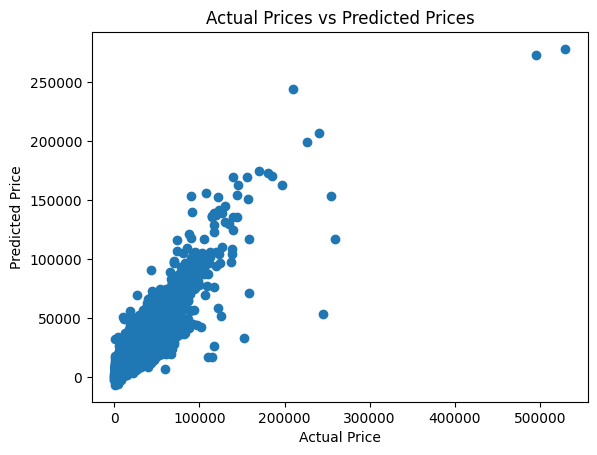

In [143]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Model Combination

In [144]:
import optuna
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.model_selection import cross_val_score

In [145]:
# Define the base models with fixed parameters
rf = RandomForestRegressor(
    n_estimators=231,
    max_depth=40,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='log2',
    random_state=42
)

xgb = XGBRegressor(
    n_estimators=292,
    max_depth=10,
    learning_rate=0.0769936478290876,
    min_child_weight=6,
    subsample=0.8553774408813275,
    colsample_bytree=0.9456452572230258,
    random_state=42
)

In [146]:
# Create the StackingRegressor
stacked_model = StackingRegressor(
    estimators=[('rf', rf), ('xgb', xgb)],
    final_estimator=XGBRegressor(
        n_estimators=50,
        learning_rate=0.1,
        random_state=42
    )
)

# Fit the stacked model
stacked_model.fit(X_train, y_train)

# Make predictions
y_pred = stacked_model.predict(X_test)

# Calculate r2 score
print("R^2 Score:", r2_score(y_test, y_pred))

R^2 Score: 0.8578292727470398


In [147]:
# # Objective function for Optuna
# def objective(trial):
#     n_estimators_final = trial.suggest_int('n_estimators_final', 50, 200)
#     learning_rate_final = trial.suggest_float('learning_rate_final', 0.01, 0.3)

#     # Create the StackingRegressor with optimized final estimator
#     stacked_model = StackingRegressor(
#         estimators=[('rf', rf), ('xgb', xgb)],
#         final_estimator=XGBRegressor(
#             n_estimators=n_estimators_final,
#             learning_rate=learning_rate_final,
#             random_state=42
#         )
#     )

#     score = cross_val_score(stacked_model, X_train, y_train, cv=5, scoring='r2')
#     return score.mean()

In [148]:
# # Create a study object and optimize
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=25)

# # Print the best parameters
# print("Best Parameters:", study.best_params)
# print("Best Cross-Validation R^2 Score:", study.best_value)

In [149]:
# # Create the final model using the best parameters
# best_params = study.best_params

# final_stacked_model = StackingRegressor(
#     estimators=[('rf', rf), ('xgb', xgb)],
#     final_estimator=XGBRegressor(
#         n_estimators=best_params['n_estimators_final'],
#         learning_rate=best_params['learning_rate_final'],
#         random_state=42
#     )
# )

# # Fit the final stacked model
# final_stacked_model.fit(X_train, y_train)

# # Make predictions
# y_pred = final_stacked_model.predict(X_test)

# # Calculate r2 score
# print("Final R^2 Score:", r2_score(y_test, y_pred))

Visualize the actual prices and Predicted prices

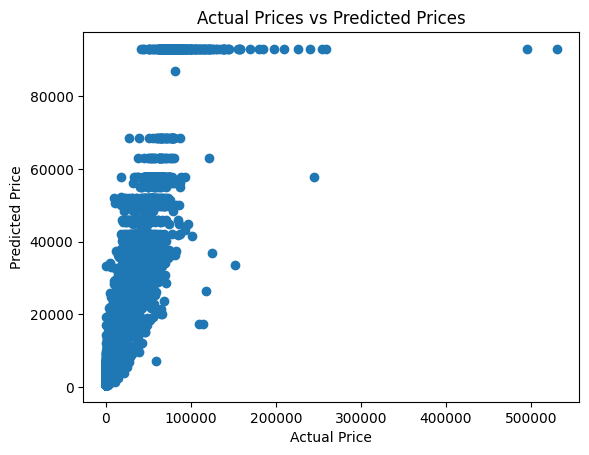

In [150]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Final Model Evaluation

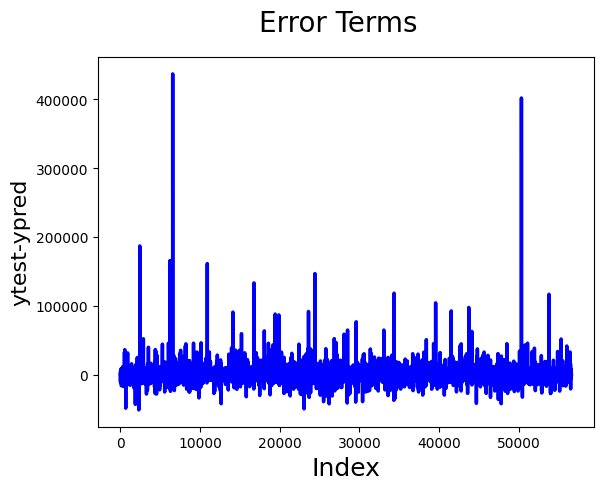

In [151]:
# Error terms
c = [i for i in range(len(y_pred))]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

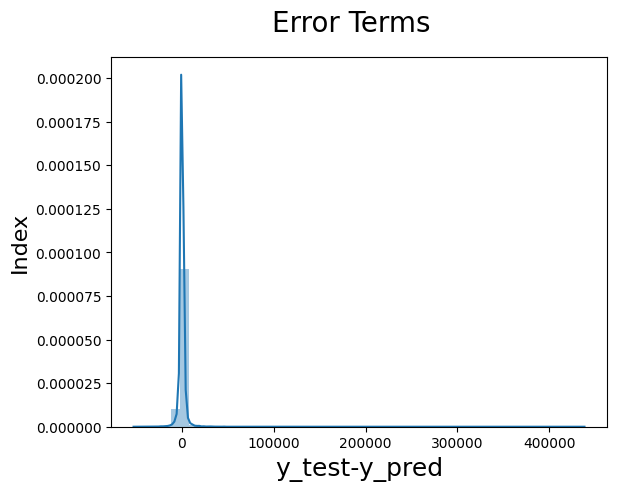

In [152]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

In [153]:
# mean
np.mean(y_test-y_pred)

180.17258469007567

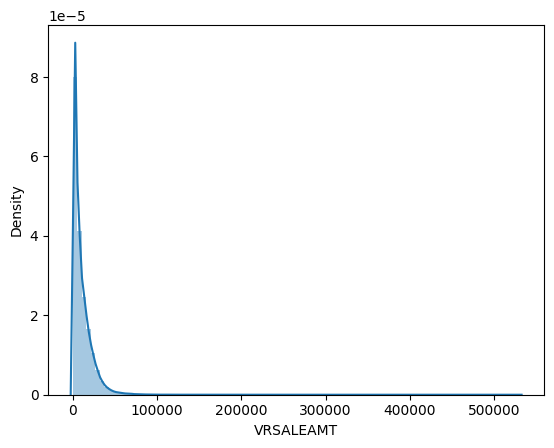

In [154]:
sns.distplot(cars['VRSALEAMT'],bins=100)
plt.show()

Export the Predictions

In [155]:
y_test.head()

6     13230
11    16500
21     6200
38    13900
43    26900
Name: VRSALEAMT, dtype: int64

In [163]:
import pandas as pd

# Create a DataFrame with the original prices and the predicted sales prices
result_df = pd.DataFrame({
    'SoldPrice': y_test,  # Original prices from y_test
    'XGB_Predictions': xgb_predictions,
    'RF_Predictions': rf_predictions,
    'Stacked_Predictions': y_pred
})

# Export the DataFrame to a CSV file
result_df.to_csv('May Price Predictions.csv', index=False)

print("Predictions and original prices have been exported to 'Price Predictions.csv'.")

Predictions and original prices have been exported to 'Price Predictions.csv'.


Exporting the Model

In [53]:
import pickle

pickle.dump(cars,open('cars.pkl','wb'))
pickle.dump(rf,open('rf.pkl','wb'))
pickle.dump(xgb, open('xgb.pkl', 'wb')) 
pickle.dump(stacked_model, open('stacked_model.pkl', 'wb')) 
with open('label_mappings.pkl', 'wb') as f:
    pickle.dump(label_mappings, f)
with open('frequency_mappings.pkl', 'wb') as f:
    pickle.dump(frequency_mappings, f)